In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="darkgrid")
%matplotlib inline

In [11]:
jobs_data = pd.read_csv('../Scraped_Data/US_jobs_city_25k_2020-08-11.csv', encoding='UTF-8')

In [12]:
jobs_data.head(5)

,Expected_jobs,Actual_jobs,City,State
0,189,148,Roslyn,Washington
1,187,111,Sprague,Washington
2,27597,1106,Gig Harbor,Washington
3,3269,992,Tenino,Washington
4,1040,649,Jamestown,Washington


In [13]:
jobs_data.describe()

,Expected_jobs,Actual_jobs
count,26415.000000,26415.000000
mean,6872.746583,38.432406
std,14037.848778,155.822639
min,1.000000,0.000000
25%,435.000000,0.000000
50%,1458.000000,0.000000
75%,5549.000000,3.000000
max,94428.000000,1434.000000


In [14]:
jobs_data.dtypes

Expected_jobs     int64
Actual_jobs       int64
City             object
State            object
dtype: object

## Analysing First digits of Expected Jobs vs Actual Jobs

In [15]:
jobs_data['Expected_jobs_first'] = jobs_data['Expected_jobs'].astype(str).str[0]
jobs_data['Actual_jobs_first'] = jobs_data['Actual_jobs'].astype(str).str[0]

In [16]:
jobs_data.dtypes

Expected_jobs           int64
Actual_jobs             int64
City                   object
State                  object
Expected_jobs_first    object
Actual_jobs_first      object
dtype: object

In [17]:
jobs_data.head()

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first
0,189,148,Roslyn,Washington,1,1
1,187,111,Sprague,Washington,1,1
2,27597,1106,Gig Harbor,Washington,2,1
3,3269,992,Tenino,Washington,3,9
4,1040,649,Jamestown,Washington,1,6


In [18]:
jobs_data.describe(include="all")

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first
count,26415.000000,26415.000000,26415,26415,26415,26415
unique,NaN,NaN,17803,52,9,10
top,NaN,NaN,Franklin,Pennsylvania,1,0
freq,NaN,NaN,27,1655,7375,13338
mean,6872.746583,38.432406,NaN,NaN,NaN,NaN
std,14037.848778,155.822639,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,435.000000,0.000000,NaN,NaN,NaN,NaN
50%,1458.000000,0.000000,NaN,NaN,NaN,NaN
75%,5549.000000,3.000000,NaN,NaN,NaN,NaN


### Seprating first digit data

In [19]:
first_digit_data = jobs_data[['Expected_jobs_first','Actual_jobs_first']]

In [20]:
first_digit_data.head()

,Expected_jobs_first,Actual_jobs_first
0,1,1
1,1,1
2,2,1
3,3,9
4,1,6


In [21]:
Expected_first = first_digit_data.Expected_jobs_first.value_counts()
print(Expected_first[Expected_first>1])

1    7375
2    5007
3    3351
4    2645
5    2066
6    1936
7    1666
8    1264
9    1105
Name: Expected_jobs_first, dtype: int64


In [22]:
Actual_first = first_digit_data.Actual_jobs_first.value_counts()
print(Expected_first[Actual_first>1])

1    7375
2    5007
3    3351
4    2645
5    2066
6    1936
7    1666
8    1264
9    1105
Name: Expected_jobs_first, dtype: int64


### Expected Jobs

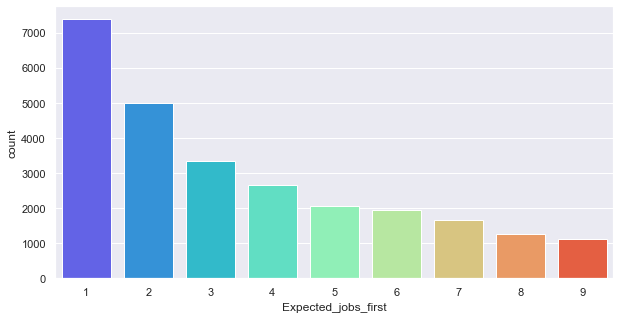

In [23]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.countplot(x='Expected_jobs_first',data=first_digit_data,palette='rainbow')

[Text(0, 0.5, 'Percent')]

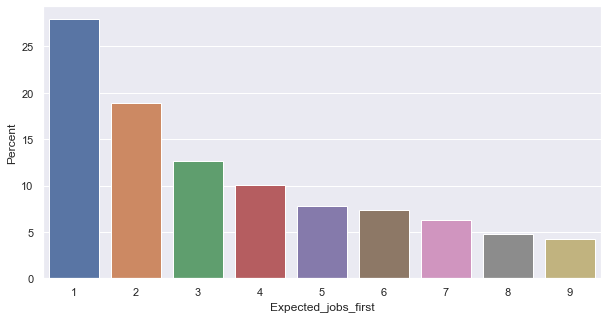

In [24]:
ax = sns.barplot(x="Expected_jobs_first", y="Expected_jobs_first", 
                 data=first_digit_data, 
                 estimator=lambda Expected_jobs_first: len(Expected_jobs_first) / len(first_digit_data) * 100)
ax.set(ylabel="Percent")

### Actual jobs

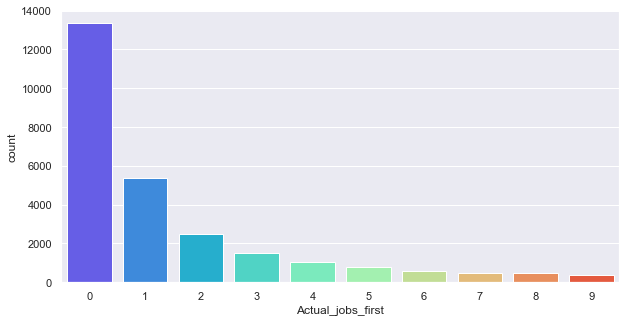

In [25]:
sns.countplot(x='Actual_jobs_first',data=first_digit_data,palette='rainbow')

[Text(0, 0.5, 'Percent')]

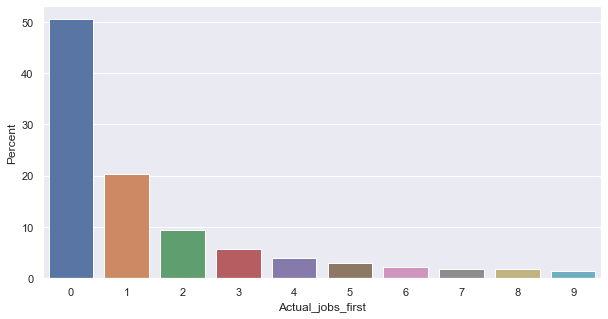

In [26]:
ax = sns.barplot(x="Actual_jobs_first", y="Actual_jobs_first", 
                 data=first_digit_data, 
                 estimator=lambda Actual_jobs_first: len(Actual_jobs_first) / len(first_digit_data) * 100)
ax.set(ylabel="Percent")

### Difference in Expected vs Actual jobs

In [27]:
jobs_data['diff'] = jobs_data['Expected_jobs'] - jobs_data['Actual_jobs']

In [28]:
jobs_data['diff_first'] = jobs_data['diff'].astype(str).str[0]

In [38]:
jobs_data.head()

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first,diff,diff_first
0,189,148,Roslyn,Washington,1,1,41,4
1,187,111,Sprague,Washington,1,1,76,7
2,27597,1106,Gig Harbor,Washington,2,1,26491,2
3,3269,992,Tenino,Washington,3,9,2277,2
4,1040,649,Jamestown,Washington,1,6,391,3


In [36]:
# ax = sns.barplot(x="diff_first", y="diff_first", 
#                  data=jobs_data, 
#                  estimator=lambda diff_first: len(diff_first) / len(jobs_data) * 100)
# ax.set(ylabel="Percent")

In [46]:
jobs_data.loc[jobs_data['diff'] < -1].sort_values(by=['diff'])

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first,diff,diff_first
8906,39,732,Speculator,New York,3,7,-693,-
6977,22,47,Langdon,North Dakota,2,4,-25,-
24317,7,23,Cooke City,Montana,7,2,-16,-
5049,6,21,Sterling City,Texas,6,2,-15,-
4024,22,36,Elbert,Texas,2,3,-14,-
7009,4,17,Wishek,North Dakota,4,1,-13,-
7115,13,25,Bowman,North Dakota,1,2,-12,-
7084,16,28,Dunn Center,North Dakota,1,2,-12,-
4303,14,26,Jayton,Texas,1,2,-12,-
7015,14,24,Hettinger,North Dakota,1,2,-10,-


### All jobs on one graph (Expected Sorted, desending)

In [32]:
new_1 = jobs_data[['Expected_jobs','Actual_jobs']] 
new_1 = new_1.sort_values(by=['Expected_jobs'], ascending=False).reset_index(drop=True)

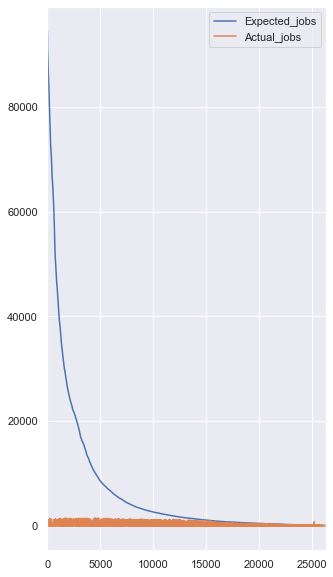

In [33]:
plt.rcParams['figure.figsize'] = [5, 10]
new_1.plot(kind='line')

(-150, 2000)

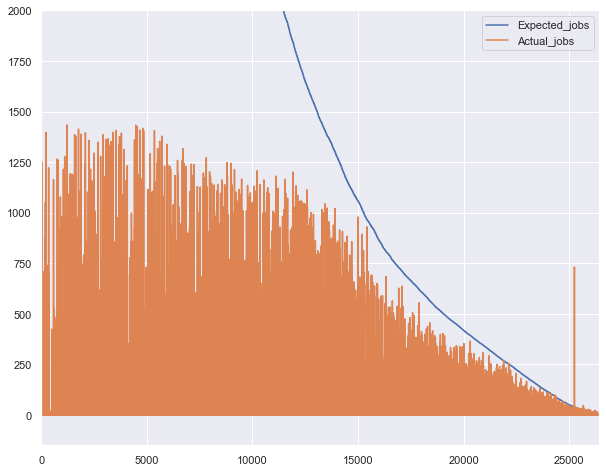

In [35]:
plt.rcParams['figure.figsize'] = [10, 8]
new_1.plot(kind='line', sort_columns=True)
plt.ylim(-150, 2000)